# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

Approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from the Cleveland data from the UCI Mahine Learning Repository.
There is also a version of it available on Kaggle.

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features
* age
* sex
* cp
* trestbps
* chol
* fbs
* restecg
* thalach
* exang
* oldpeak
* slope
* ca
* thal
* target

# Tools
We'll use pandas, Matplotlib, and Scikit-Learn.

In [1]:
# Import libraries

# EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [2]:
# Import data
df = pd.read_csv("./data/heart-disease.csv")

### EDA

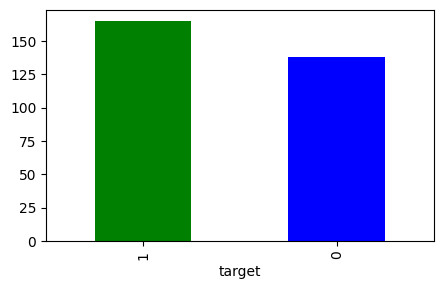

In [3]:
# Snippet of the data
df.head()

# Shape of the data
df.shape    # 303 rows and 14 columns

# Data types
df.dtypes     # All of the data types are numerical

# Descriptive statistics
df.describe()

# Missing values
df.isna().sum()    # No missing values

# Target Count
df["target"].value_counts()
df["target"].value_counts().plot(kind="bar", color=["green", "blue"], figsize=(5, 3));

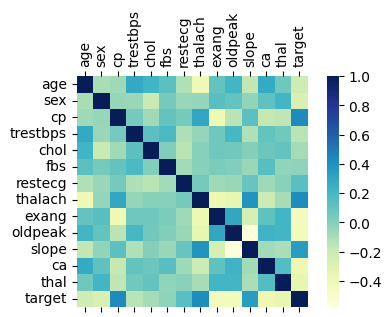

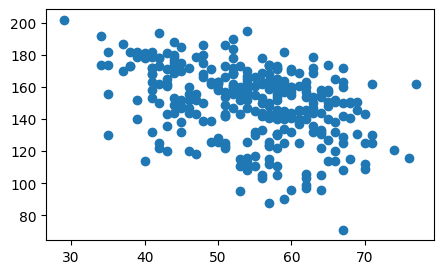

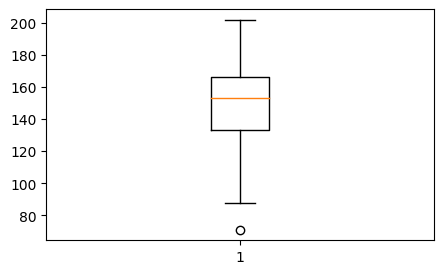

In [4]:
# Plotting

# Correlation Matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5,3))
ax.matshow(df.corr());

# Heatmap (Correlation Matrix using Seaborn)
sns.heatmap(df.corr(), annot=False, cmap="YlGnBu")

# Outlier detection
fig, ax = plt.subplots(figsize=(5,3))
ax.scatter(df["age"], df["thalach"]);

# Boxplot
fig, ax = plt.subplots(figsize=(5,3))
ax.boxplot(df["thalach"]);

In [5]:
# Heart Disease Frequency according to Sex
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


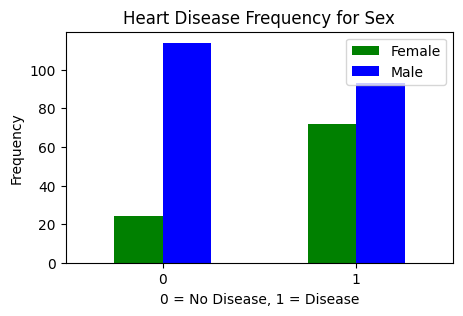

In [6]:
# Create a plot of crosstab
pd.crosstab(df["target"], df["sex"]).plot(kind="bar", figsize=(5,3), color=["green", "blue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Frequency")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);


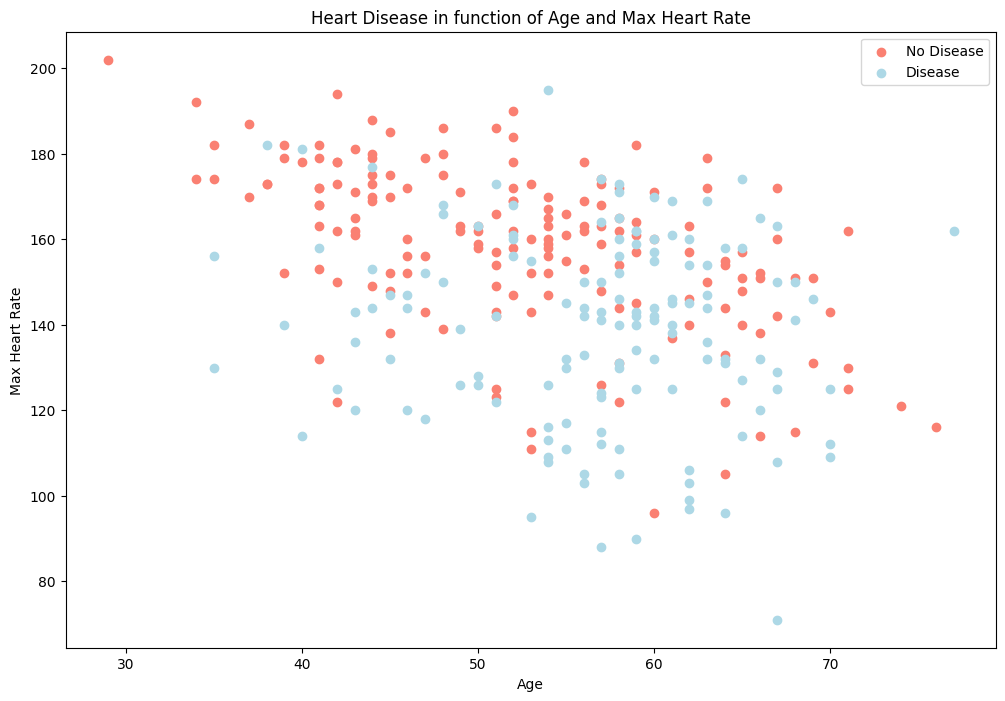

In [7]:
# Age vs Max Heart Rate for Heart Disease
plt.figure(figsize=(12,8))

# Scatter with positive examples
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="lightblue")

# Customize the plot
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["No Disease", "Disease"])


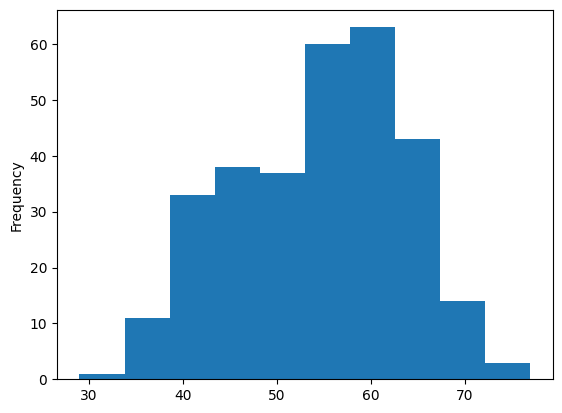

In [8]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

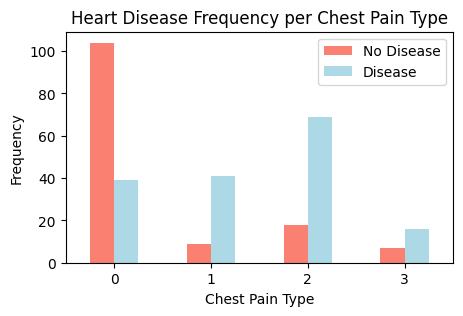

In [9]:
# Heart Disease Frequency per Chest Pain Type
pd.crosstab(df.cp, df.target)

pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(5,3), color=["salmon", "lightblue"])

# Customize the plot
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

<Axes: >

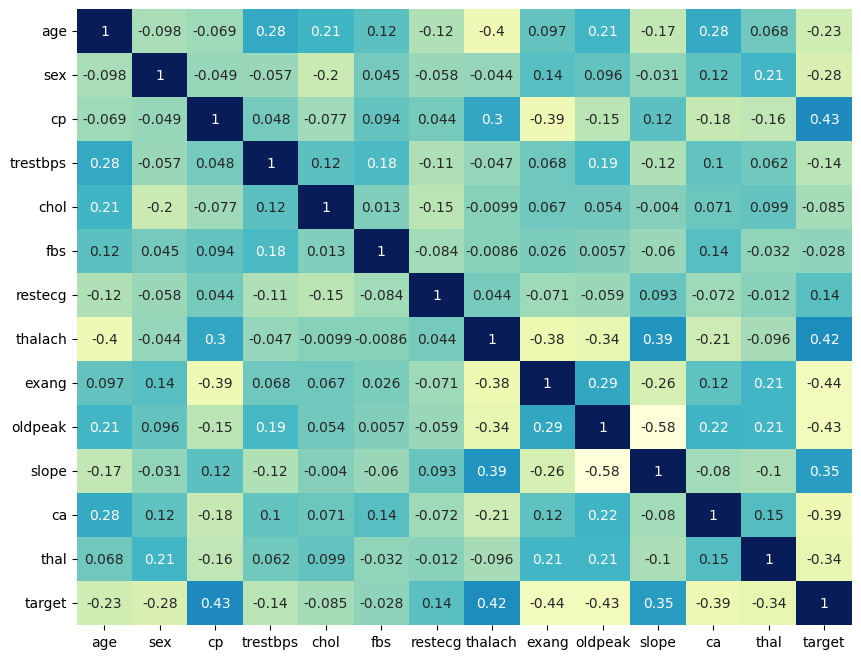

In [10]:
# Correlation Matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", cbar=False)

## Modelling

In [11]:

# Split data into X and y
X = df.drop("target", axis=1)
y = df["target"]

# Split data into train and test sets
# train_index = int(0.7 * len(X))
# val_index = int(train_index + 0.15 * len(X))

# X_train, y_train = X[:train_index], y[:train_index]
# X_val, y_val = X[train_index:val_index], y[train_index:val_index]
# X_test, y_test = X[val_index:], y[val_index:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
# Logistic Regression

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dictionary of different Scikit-Learn machine learning models
    X_train: training data
    X_test: testing data
    y_train: training labels
    y_test: testing labels
    """
    
    np.random.seed(42)
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [13]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

<Axes: >

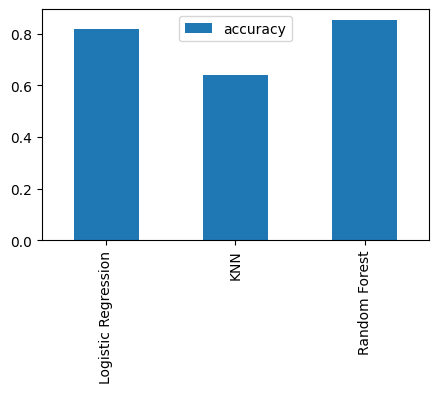

In [14]:
# Model Comparison

model_scores = pd.DataFrame(model_scores, index=["accuracy"])
model_scores.T.plot.bar(figsize=(5,3))

Now look at the following:
* Hyperparameter Tuning
* Feature Importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC curve
* Area under the curve (AUC)

<Axes: >

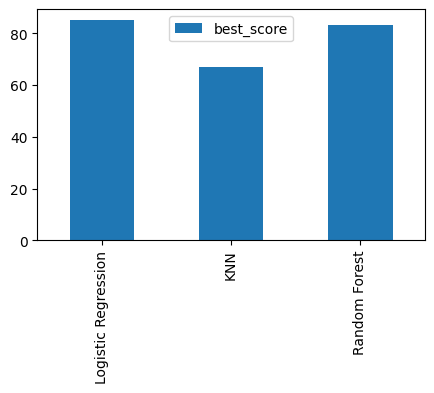

In [15]:
# Hyperparameter Tuning

search_results = {}

grid_params = {
    "Logistic Regression": {
        "penalty": ["l1", "l2"],
        "C": np.logspace(-4, 4, 20),
        "solver": ["liblinear"],
        "max_iter": [1000, 1500, 2000]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7, 10]
    },
    "Random Forest": {
        "n_estimators": [100, 300],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2]
    }
}

for model_name, model in models.items():
    gs_model = GridSearchCV(model, param_grid=grid_params[model_name], cv=5, verbose=0)
    gs_model.fit(X_train, y_train)
    
    search_results[model_name] = {
        "best_params": gs_model.best_params_,
        "best_score": float(f"{gs_model.best_score_*100:.2f}"),
        "best_estimator": gs_model.best_estimator_
    }

search_results = pd.DataFrame(search_results)
search_results.T.plot.bar(figsize=(5,3))


In [16]:
search_results

,Logistic Regression,KNN,Random Forest
best_params,"{'C': 0.08858667904100823, 'max_iter': 1000, '...",{'n_neighbors': 7},"{'max_depth': 10, 'min_samples_leaf': 1, 'min_..."
best_score,85.11,66.91,83.45
best_estimator,"LogisticRegression(C=0.08858667904100823, max_...",KNeighborsClassifier(n_neighbors=7),"(DecisionTreeClassifier(max_depth=10, max_feat..."


In [ ]:
# Evaluation Metrics

# Feature Importance
best_model = search_results["Logistic Regression"]["best_estimator"]

y_preds = best_model.predict(X_test)

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [18]:
y_preds

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

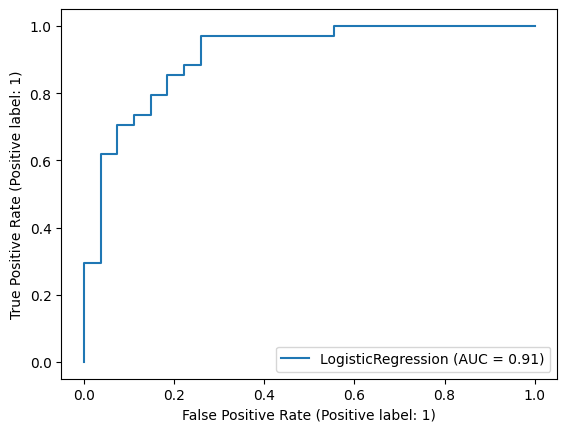

In [19]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

RocCurveDisplay.from_estimator(best_model, X_test, y_test)

[[20  7]
 [ 1 33]]


<Axes: >

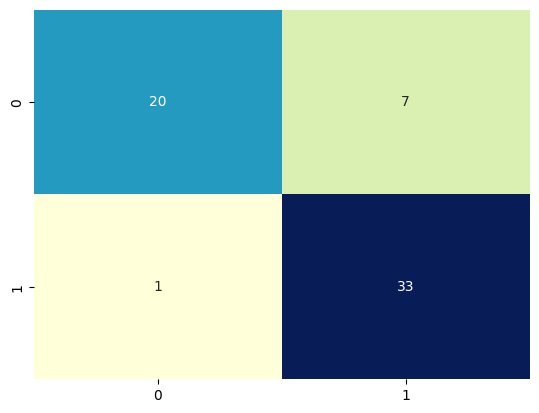

In [20]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cmap="YlGnBu", cbar=False)

In [21]:
# Classification Report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83        27
           1       0.82      0.97      0.89        34

    accuracy                           0.87        61
   macro avg       0.89      0.86      0.86        61
weighted avg       0.88      0.87      0.87        61



In [22]:
# Cross validation classification report
print("Cross Validation Classification Report: Logistic Regression")
print("Accuracy: " + str(round(cross_val_score(best_model, X, y, cv=5, scoring="accuracy").mean() * 100, 2)) + '% ')

# Precision
print("Precision: " + str(round(cross_val_score(best_model, X, y, cv=5, scoring="precision").mean() * 100, 2)) + '%')

# Recall
print("Recall: " + str(round(cross_val_score(best_model, X, y, cv=5, scoring="recall").mean() * 100, 2)) + '%')

# F1 Score
print("F1 Score: " + str(round(cross_val_score(best_model, X, y, cv=5, scoring="f1").mean() * 100, 2)) + '%')



Cross Validation Classification Report: Logistic Regression
Accuracy: 83.48% 
Precision: 81.83%
Recall: 90.3%
F1 Score: 85.73%


### Feature Importance

In [27]:
best_model.coef_

array([[ 0.00138518, -0.56872641,  0.60208487, -0.00678425, -0.00129004,
         0.02417242,  0.27744579,  0.01979762, -0.41222184, -0.54731336,
         0.20640821, -0.50631815, -0.51036372]])

In [34]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(best_model.coef_[0])))
feature_dict

{'age': 0.0013851830978745606,
 'sex': -0.5687264149421885,
 'cp': 0.6020848704523086,
 'trestbps': -0.0067842538322025,
 'chol': -0.0012900445201984361,
 'fbs': 0.024172422637642334,
 'restecg': 0.27744579038200584,
 'thalach': 0.01979762194490792,
 'exang': -0.4122218444744018,
 'oldpeak': -0.5473133597617482,
 'slope': 0.20640820606518306,
 'ca': -0.5063181464855238,
 'thal': -0.5103637201521946}

<Axes: title={'center': 'Feature Importance'}>

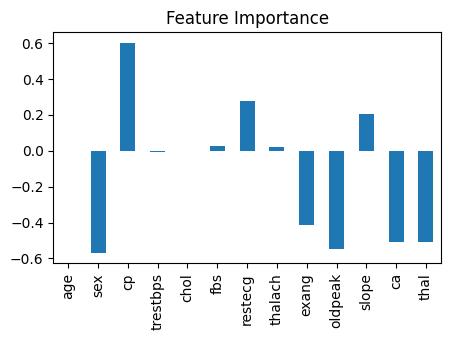

In [40]:
# Visualize feature importance
feature_importances = pd.DataFrame(feature_dict, index=[0])
feature_importances.T.plot.bar(title="Feature Importance", legend=False, figsize=(5,3))

In [41]:
# Save the model
import pickle
pickle.dump(best_model, open("heart-disease-model.pkl", "wb"))